In [1]:
import torch
print(torch.__version__)

2.2.0


In [2]:
# Is MPS available?
print(torch.backends.mps.is_available())

# Was the current version of PyTorch built with MPS activated?
print(torch.backends.mps.is_built())

True
True


99 1602.4674072265625
199 1063.50244140625
299 706.8555908203125
399 470.83929443359375
499 314.6435241699219
599 211.26736450195312
699 142.84478759765625
799 97.5543212890625
899 67.57347106933594
999 47.72565841674805
1099 34.58485794067383
1199 25.883991241455078
1299 20.122404098510742
1399 16.306787490844727
1499 13.779581069946289
1599 12.105584144592285
1699 10.996591567993164
1799 10.261802673339844
1899 9.774916648864746
1999 9.452234268188477
Result: y = -0.005476563237607479 + 0.8327656388282776 x + 0.0009447998600080609 x^2 + -0.08992012590169907 x^3
Execution Time: 0.09881591796875 seconds


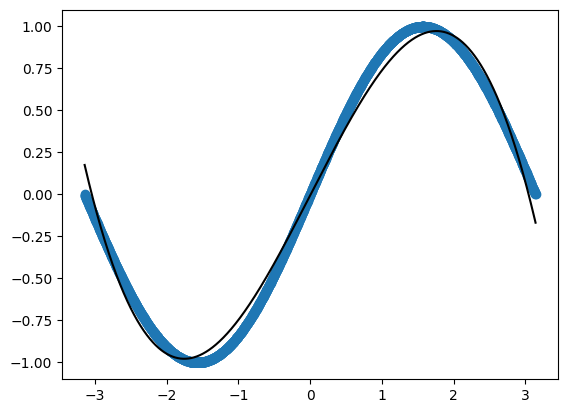

In [24]:
# If no ERRORS are raised MPS (Apple GPU) runs the code

import math
import time

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("mps")

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)
# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

# start time stamp
startTime = time.time()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    Y_pred = a + b * x + c * x ** 2 + d * x ** 3
    # Compute and print loss
    loss = (Y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_Y_pred = 2.0 * (Y_pred - y)
    grad_a = grad_Y_pred.sum()
    grad_b = (grad_Y_pred * x).sum()
    grad_c = (grad_Y_pred * x ** 2).sum()
    grad_d = (grad_Y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

endTime = time.time()

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

print(f'Execution Time: {endTime - startTime} seconds')


# plot the found function
import matplotlib.pyplot as plt

plt.plot(x.cpu().numpy(), y.cpu().numpy(), 'o')
plt.plot(x.cpu().numpy(), Y_pred.cpu().detach().numpy(), 'k-')
plt.show()
